In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/nilaimahasiswa.csv', sep=';')
df.head()

,Mahasiswa,uts,uas
0,AHMAD,15,46
1,ARFENDO,66,77
2,LATIFUDIN,25,33
3,HENDI,53,81
4,M. FERYAN,20,75


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Mahasiswa  50 non-null     object
 1   uts        50 non-null     int64 
 2   uas        50 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.3+ KB


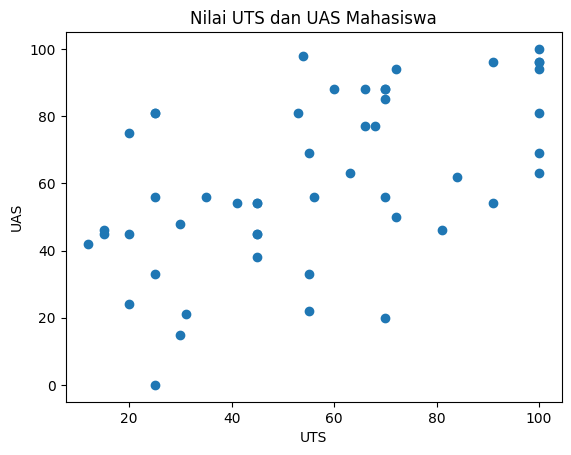

In [ ]:
plt.scatter(df['uts'], df['uas'])
plt.xlabel('UTS')
plt.ylabel('UAS')
plt.title('Nilai UTS dan UAS Mahasiswa')
plt.show()

DATA TRAINING

In [ ]:
x_train = df[['uts', 'uas']].values

FEATURE SCALING

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)

x_train

array([[0.03409091, 0.46      ],
       [0.61363636, 0.77      ],
       [0.14772727, 0.33      ],
       [0.46590909, 0.81      ],
       [0.09090909, 0.75      ],
       [1.        , 0.94      ],
       [0.48863636, 0.69      ],
       [0.14772727, 0.56      ],
       [0.14772727, 0.81      ],
       [0.20454545, 0.48      ],
       [0.03409091, 0.45      ],
       [0.78409091, 0.46      ],
       [0.63636364, 0.77      ],
       [0.68181818, 0.5       ],
       [0.5       , 0.56      ],
       [0.57954545, 0.63      ],
       [1.        , 0.69      ],
       [0.26136364, 0.56      ],
       [0.48863636, 0.33      ],
       [0.21590909, 0.21      ],
       [0.48863636, 0.22      ],
       [0.65909091, 0.85      ],
       [0.20454545, 0.15      ],
       [0.14772727, 0.81      ],
       [0.        , 0.42      ],
       [0.09090909, 0.24      ],
       [0.68181818, 0.94      ],
       [0.14772727, 0.        ],
       [0.89772727, 0.54      ],
       [0.54545455, 0.88      ],
       [0.

CLUSTERING

In [ ]:
from sklearn.cluster import KMeans
kmean = KMeans(n_clusters=2)
kmean

KMeans(n_clusters=2)

In [ ]:
y_cluster = kmean.fit_predict(x_train)
y_cluster

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1], dtype=int32)

In [ ]:
df['Cluster'] = y_cluster
df.head()

,Mahasiswa,uts,uas,Cluster
0,AHMAD,15,46,0
1,ARFENDO,66,77,1
2,LATIFUDIN,25,33,0
3,HENDI,53,81,1
4,M. FERYAN,20,75,0


In [ ]:
kmean.cluster_centers_
#titik centroid

array([[0.25227273, 0.4356    ],
       [0.75272727, 0.7836    ]])

Visualisasi

<ipython-input-69-8401ae1acf3a>:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(kmean.cluster_centers_[0,0], kmean.cluster_centers_[0,1], marker='*', s=150, cmap='rainbow', label='Centroid 0')
<ipython-input-69-8401ae1acf3a>:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(kmean.cluster_centers_[1,0], kmean.cluster_centers_[1,1], marker='*', s=150, cmap='rainbow', label='Centroid 1')


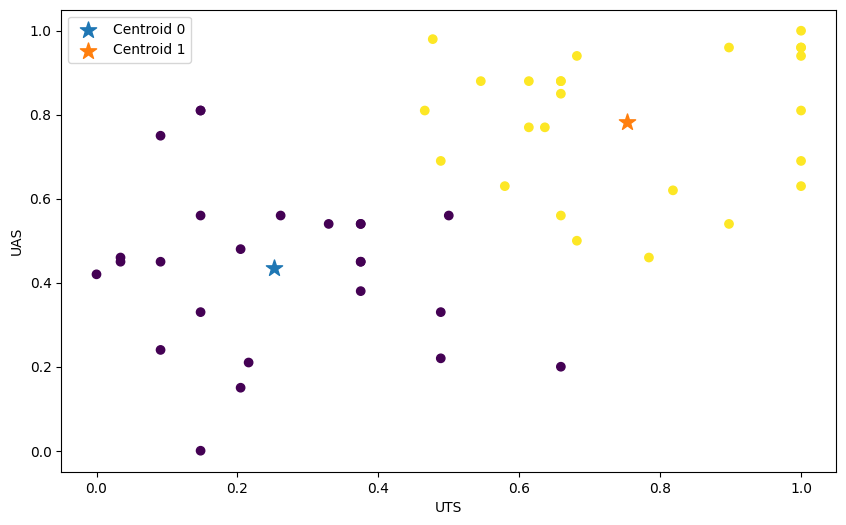

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(x_train[:,0], x_train[:,1], c=kmean.labels_)
plt.scatter(kmean.cluster_centers_[0,0], kmean.cluster_centers_[0,1], marker='*', s=150, cmap='rainbow', label='Centroid 0')
plt.scatter(kmean.cluster_centers_[1,0], kmean.cluster_centers_[1,1], marker='*', s=150, cmap='rainbow', label='Centroid 1')
#plt.scatter(kmean.cluster_centers_[2,0], kmean.cluster_centers_[2,1], marker='*', s=150, cmap='rainbow', label='Centroid 2')
plt.xlabel('UTS')
plt.ylabel('UAS')
plt.legend()
plt.show()

JUMLAH KLASTER TERBAIK

In [ ]:
inertias = []
k_range = range(1,11)
for k in k_range:
  km = KMeans(n_clusters=k).fit(x_train)
  inertias.append(km.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

In [ ]:
inertias

[7.842257805785125,
 3.197773404958677,
 2.4267319466388484,
 1.8270037266332158,
 1.3265220854524267,
 0.9758758143939394,
 0.7770578293486818,
 0.5653348005214484,
 0.43037305194805214,
 0.3737635618358915]

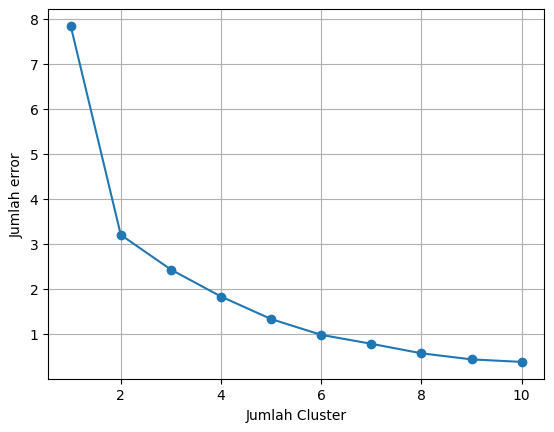

In [ ]:
plt.plot(k_range, inertias, marker='o')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Jumlah error')
plt.grid()
plt.show()

jumlah cluster terbaik adalah 2

DATASET BARU DENGAN LABEL CLUSTER

In [ ]:
df['Cluster'] = df['Cluster'].replace([0,1], ['Kurang', 'Baik'])
df.head()

,Mahasiswa,uts,uas,Cluster
0,AHMAD,15,46,Kurang
1,ARFENDO,66,77,Baik
2,LATIFUDIN,25,33,Kurang
3,HENDI,53,81,Baik
4,M. FERYAN,20,75,Kurang
